# Analysis of the Colors Used in Howl's Moving Castle

In [62]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import re

In [63]:
file_path = '/Users/rsudhir/Documents/GitHub/Data-Science-Project---Outfits-from-Ghibli-Films/howls_dominant_colors.csv'

df = pd.read_csv(file_path)

# Drop the columns for the 10th color
df = df.drop(columns=['color_10_r', 'color_10_g', 'color_10_b'])


In [64]:

def extract_frame_number(frame_path):
    match = re.search(r'output_(\d+)\.png', frame_path)
    if match:
        return int(match.group(1))
    return None

# Add frame number column and sort by frame number
df['frame_number'] = df['frame_path'].apply(extract_frame_number)
df = df.sort_values(by='frame_number').reset_index(drop=True)

df = df.drop(['frame_path'],axis=1)

# Display the first few rows of the sorted DataFrame
df.head()

,color_1_r,color_1_g,color_1_b,color_2_r,color_2_g,color_2_b,color_3_r,color_3_g,color_3_b,color_4_r,...,color_7_r,color_7_g,color_7_b,color_8_r,color_8_g,color_8_b,color_9_r,color_9_g,color_9_b,frame_number
0,4,4,4,8,4,4,8,4,4,8,...,8,4,4,8,4,4,8,4,4,1
1,4,4,4,8,4,4,8,4,4,8,...,8,4,4,8,4,4,8,4,4,2
2,4,4,4,8,4,4,8,4,4,8,...,8,4,4,8,4,4,8,4,4,3
3,4,4,4,8,4,4,8,4,4,8,...,8,4,4,8,4,4,8,4,4,4
4,4,35,59,69,67,63,4,6,10,6,...,8,39,68,4,20,44,20,52,60,5


In [65]:
# Function to combine RGB columns into a tuple
def combine_rgb(row, color_idx):
    try:
        return (int(row[f'color_{color_idx}_r']), int(row[f'color_{color_idx}_g']), int(row[f'color_{color_idx}_b']))
    except ValueError:
        return None

# Function to analyze and plot color data for a segment
def analyze_segment(segment_df, title):
    # Extract all color tuples
    all_colors = []
    num_colors = 9  # Updated number of colors per frame since we dropped the 10th color
    for idx in range(1, num_colors + 1):
        all_colors.extend(segment_df.apply(combine_rgb, color_idx=idx, axis=1))

    # Filter out None values
    all_colors = [color for color in all_colors if color is not None]

    # Count occurrences of each color
    color_counts = Counter(all_colors)


    # Convert to DataFrame for easier plotting
    color_df = pd.DataFrame(color_counts.items(), columns=['color', 'count'])

    # Convert RGB tuples to hex color codes for better visualization
    def rgb_to_hex(rgb):
        return '#{:02x}{:02x}{:02x}'.format(rgb[0], rgb[1], rgb[2])

    color_df['color_hex'] = color_df['color'].apply(rgb_to_hex)
    color_df = color_df.sort_values(by='count', ascending=False)

    # Add the color square column
    def color_square(hex_code):
        return f'<div style="width: 20px; height: 20px; background-color: {hex_code};"></div>'

    color_df['color_display'] = color_df['color_hex'].apply(color_square)

    # Display only the top 10 rows
    top_10_colors = color_df.head(10)
    display(HTML(top_10_colors.to_html(escape=False)))

    # Plot the top 10 most common colors
    plt.figure(figsize=(12, 8))
    palette = {hex_code: hex_code for hex_code in top_10_colors['color_hex']}
    sns.barplot(x='color_hex', y='count', hue='color_hex', data=top_10_colors, palette=palette, dodge=False, legend=False)
    plt.xlabel('Color')
    plt.ylabel('Count')
    plt.title(f'Top 10 Most Common Colors in {title}')
    plt.xticks(rotation=45)
    plt.show()

# Function to segment the DataFrame and analyze each segment

def segment_and_analyze(df, num_segments=3):
    # Calculate the total number of frames
    total_frames = df['frame_number'].max()
    
    # Determine the size of each segment
    segment_size = total_frames // num_segments

    segments = []
    for i in range(num_segments):
        # Calculate the start and end frame numbers for the current segment
        start_frame = i * segment_size
        end_frame = (i + 1) * segment_size if i < num_segments - 1 else total_frames

        # Filter the DataFrame to include only frames within the current segment
        segments.append(df[(df['frame_number'] > start_frame) & (df['frame_number'] <= end_frame)])

    # Analyze each segment
    for i, segment_df in enumerate(segments):
        analyze_segment(segment_df, f'Segment {i+1}')



,color,count,color_hex,color_display
12944,"(8, 4, 4)",171,#080404,
33919,"(61, 100, 132)",73,#3d6484,
29606,"(28, 52, 76)",59,#1c344c,
6703,"(60, 100, 132)",57,#3c6484,
2161,"(26, 21, 18)",56,#1a1512,
13144,"(72, 49, 30)",55,#48311e,
0,"(4, 4, 4)",54,#040404,
46034,"(36, 60, 76)",53,#243c4c,
10,"(36, 60, 84)",53,#243c54,
5544,"(182, 139, 84)",52,#b68b54,


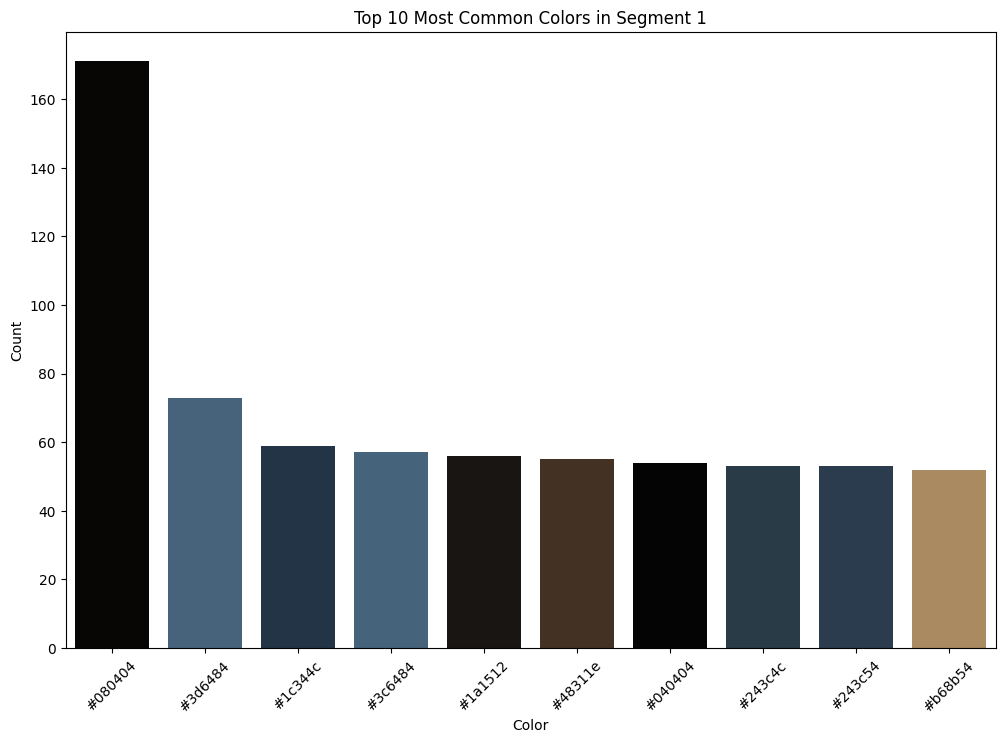

In [66]:

# Perform the segmentation and analysis for 1 segment, ie the whole movie
segment_and_analyze(df, 1)

,color,count,color_hex,color_display
4286,"(8, 4, 4)",145,#080404,
2161,"(26, 21, 18)",56,#1a1512,
4488,"(72, 49, 30)",55,#48311e,
5117,"(44, 38, 27)",51,#2c261b,
2214,"(19, 15, 15)",48,#130f0f,
17491,"(94, 78, 48)",46,#5e4e30,
22343,"(182, 183, 49)",45,#b6b731,
14625,"(99, 91, 100)",42,#635b64,
1915,"(30, 36, 41)",41,#1e2429,
952,"(38, 32, 25)",41,#262019,


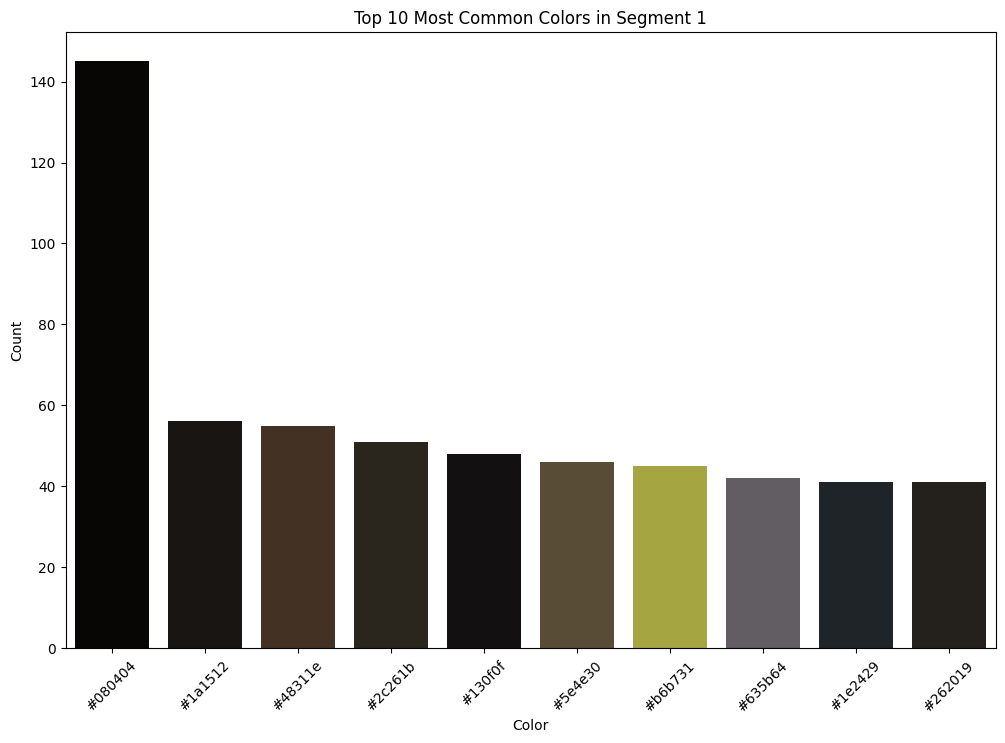

,color,count,color_hex,color_display
1299,"(182, 139, 84)",52,#b68b54,
18851,"(84, 71, 49)",45,#544731,
28045,"(163, 209, 140)",44,#a3d18c,
329,"(18, 19, 21)",42,#121315,
10576,"(49, 53, 26)",40,#31351a,
10629,"(61, 101, 140)",38,#3d658c,
11262,"(235, 187, 139)",36,#ebbb8b,
17966,"(103, 80, 45)",34,#67502d,
5562,"(60, 100, 131)",34,#3c6483,
6498,"(209, 208, 158)",33,#d1d09e,


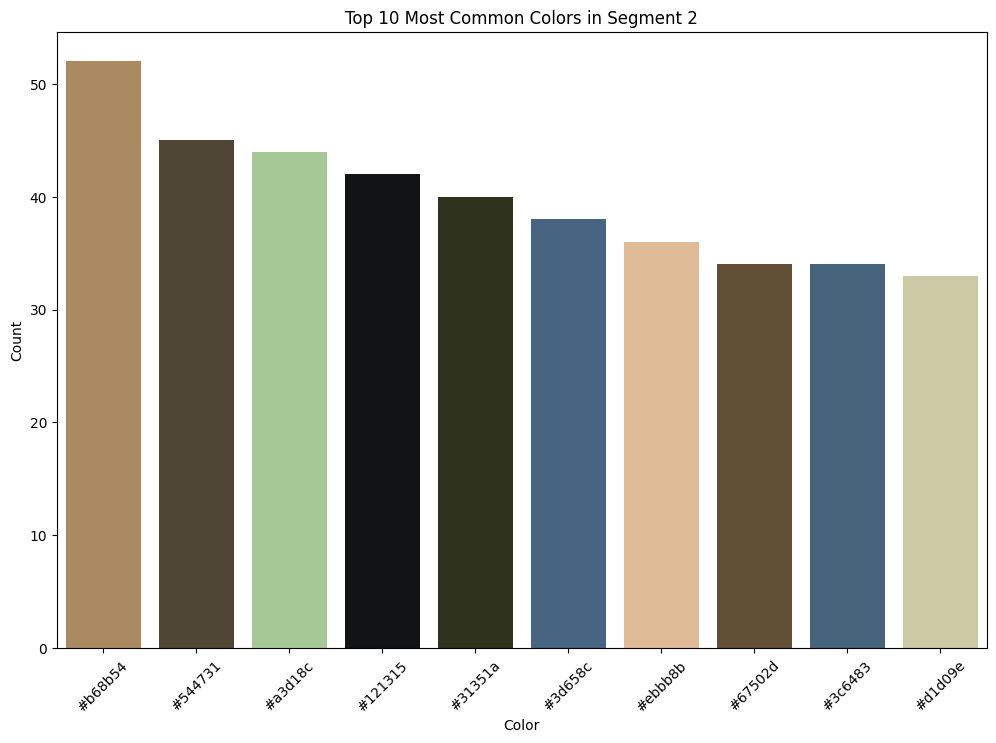

,color,count,color_hex,color_display
19993,"(28, 52, 76)",55,#1c344c,
10313,"(61, 100, 132)",52,#3d6484,
14506,"(36, 60, 76)",49,#243c4c,
17902,"(226, 216, 181)",46,#e2d8b5,
19127,"(75, 50, 28)",46,#4b321c,
13473,"(36, 60, 84)",42,#243c54,
6851,"(60, 100, 132)",41,#3c6484,
27281,"(176, 209, 91)",38,#b0d15b,
5613,"(34, 28, 19)",38,#221c13,
14536,"(130, 126, 116)",38,#827e74,


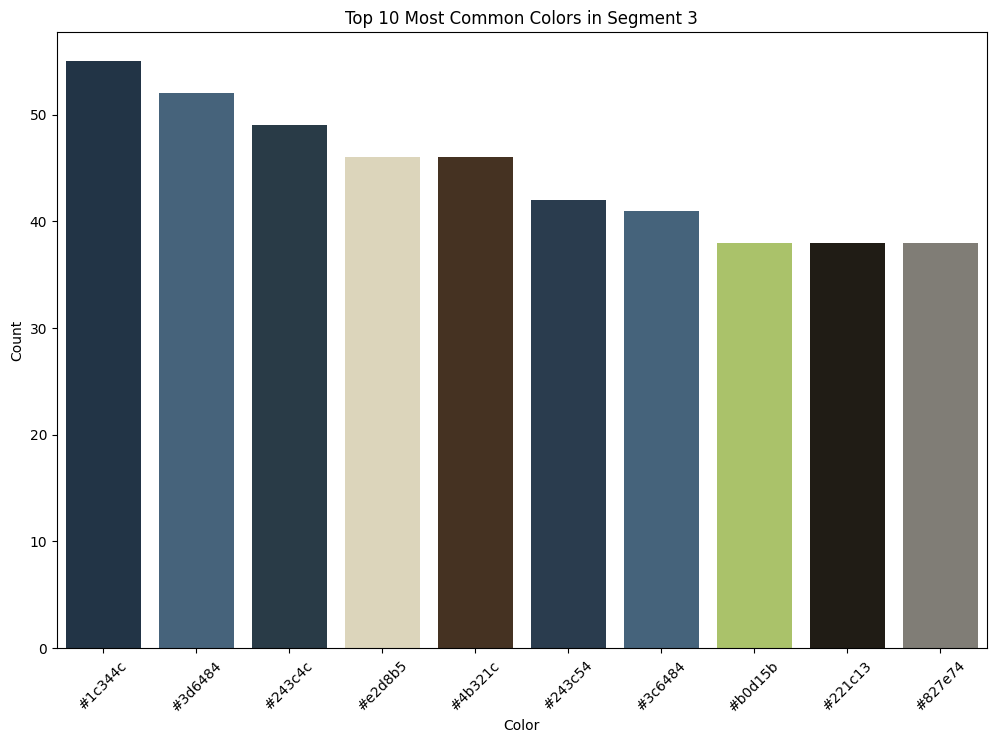

In [67]:
segment_and_analyze(df, 3)

,color,count,color_hex,color_display
2395,"(8, 4, 4)",145,#080404,
2598,"(72, 49, 30)",55,#48311e,
2161,"(26, 21, 18)",52,#1a1512,
3239,"(44, 38, 27)",51,#2c261b,
2214,"(19, 15, 15)",48,#130f0f,
10624,"(94, 78, 48)",46,#5e4e30,
13775,"(182, 183, 49)",45,#b6b731,
9421,"(99, 91, 100)",42,#635b64,
1915,"(30, 36, 41)",41,#1e2429,
2183,"(17, 14, 15)",40,#110e0f,


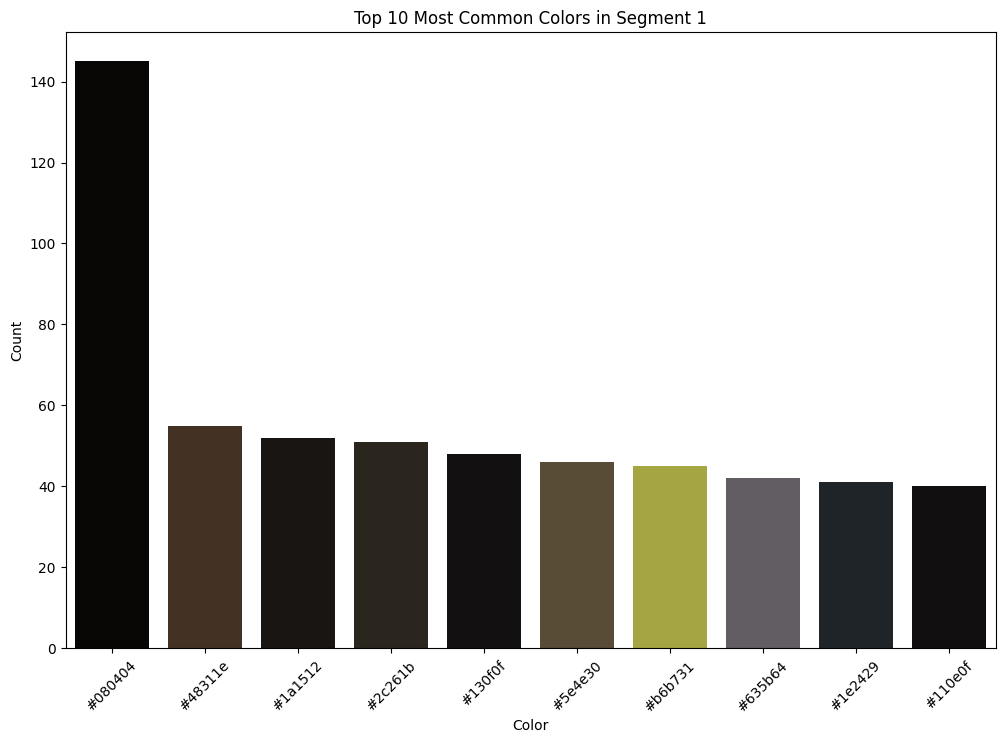

,color,count,color_hex,color_display
2241,"(18, 19, 21)",40,#121315,
5191,"(114, 115, 124)",39,#72737c,
7922,"(85, 72, 49)",36,#554831,
8113,"(73, 70, 48)",32,#494630,
4552,"(126, 117, 35)",31,#7e7523,
4665,"(30, 46, 58)",31,#1e2e3a,
15077,"(181, 199, 148)",30,#b5c794,
7184,"(205, 200, 122)",29,#cdc87a,
10780,"(85, 76, 51)",29,#554c33,
10724,"(116, 116, 132)",29,#747484,


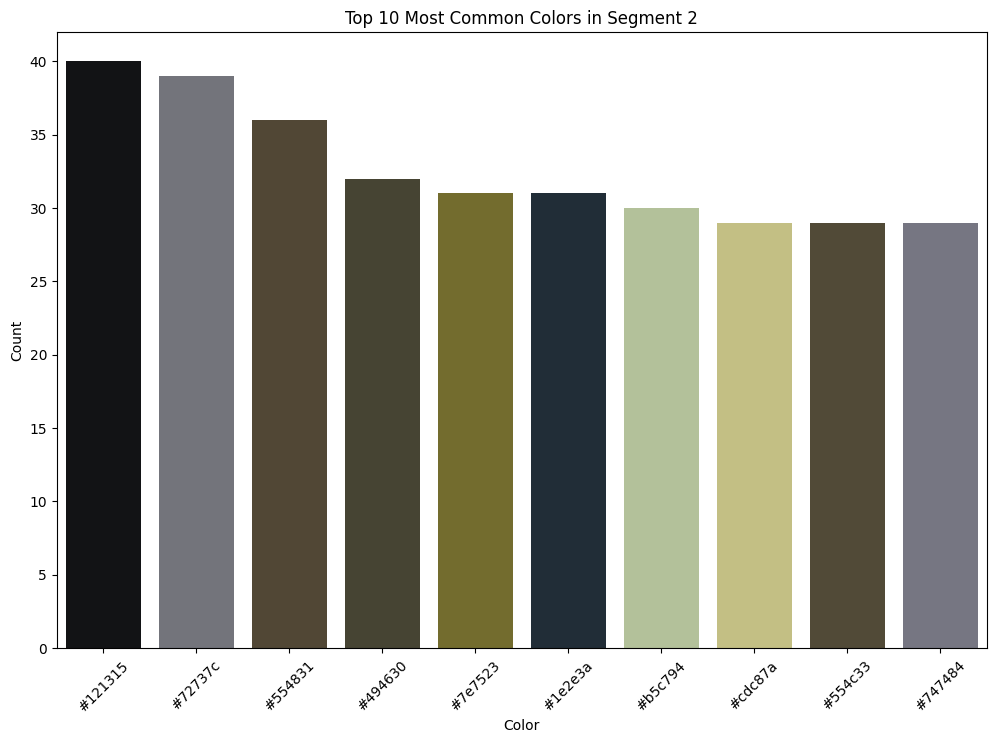

,color,count,color_hex,color_display
419,"(182, 139, 84)",52,#b68b54,
11347,"(84, 71, 49)",45,#544731,
16966,"(163, 209, 140)",44,#a3d18c,
6584,"(49, 53, 26)",40,#31351a,
6637,"(61, 101, 140)",38,#3d658c,
7270,"(235, 187, 139)",36,#ebbb8b,
3144,"(60, 100, 131)",34,#3c6483,
10451,"(103, 80, 45)",34,#67502d,
4090,"(209, 208, 158)",33,#d1d09e,
9354,"(43, 101, 37)",32,#2b6525,


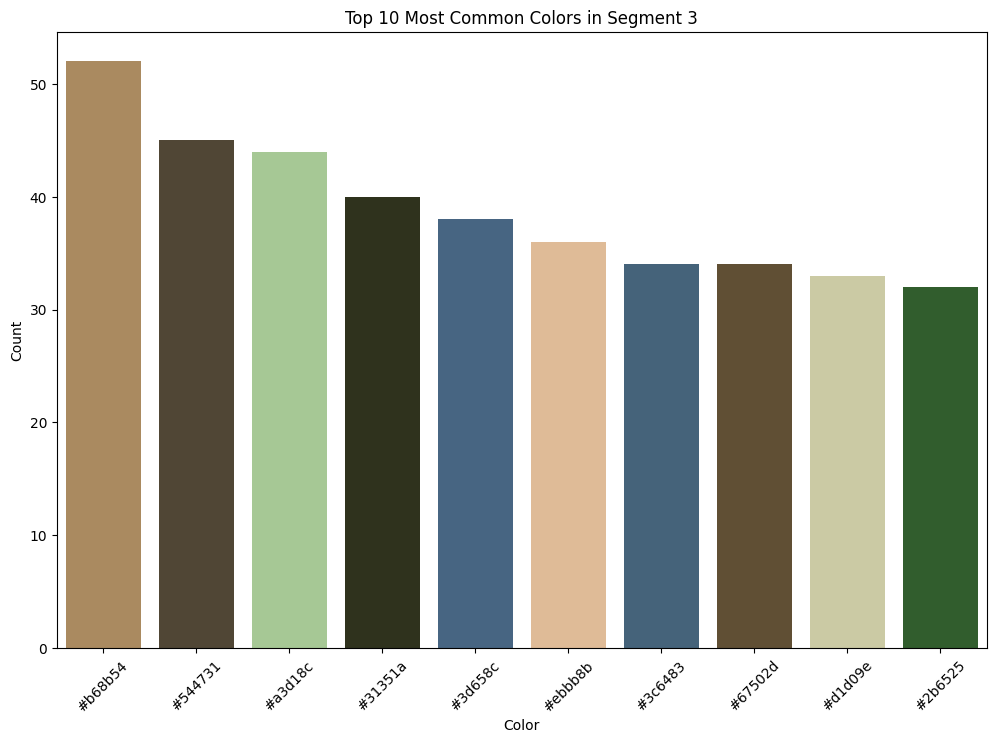

,color,count,color_hex,color_display
7355,"(61, 100, 132)",57,#3d6484,
9670,"(36, 60, 76)",50,#243c4c,
12463,"(75, 50, 28)",46,#4b321c,
9701,"(130, 126, 116)",38,#827e74,
4451,"(34, 28, 19)",38,#221c13,
7150,"(60, 100, 132)",34,#3c6484,
760,"(21, 18, 16)",34,#151210,
625,"(27, 22, 20)",33,#1b1614,
913,"(43, 30, 27)",27,#2b1e1b,
8646,"(72, 101, 112)",26,#486570,


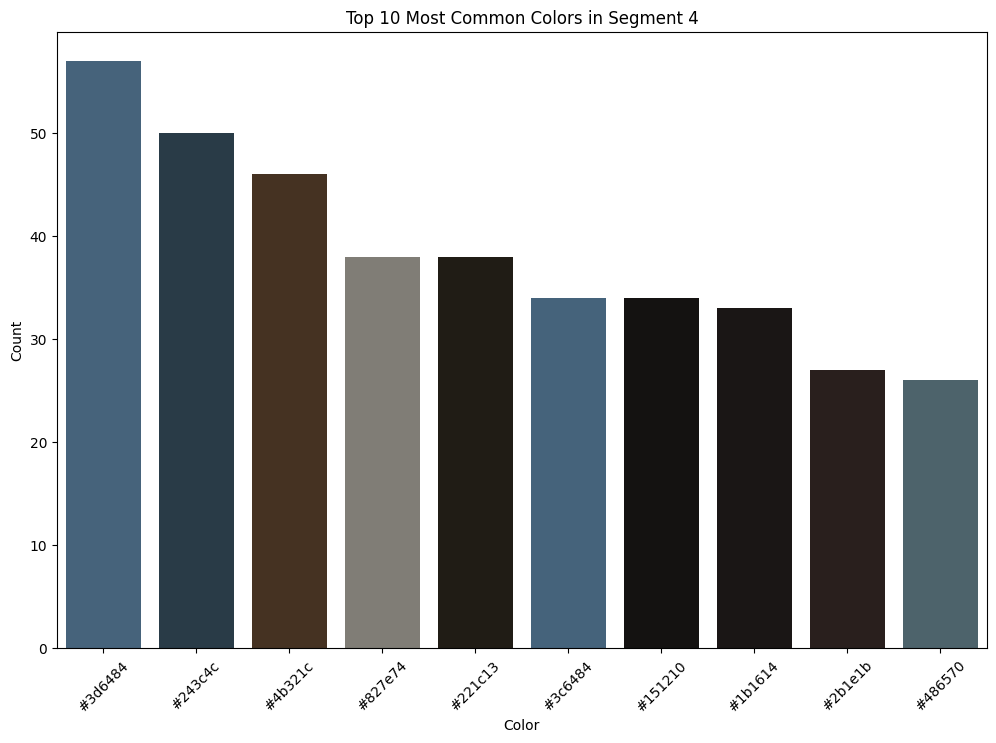

,color,count,color_hex,color_display
11274,"(28, 52, 76)",55,#1c344c,
10994,"(226, 216, 181)",46,#e2d8b5,
5323,"(120, 36, 35)",38,#782423,
16753,"(176, 209, 91)",38,#b0d15b,
1468,"(21, 21, 26)",37,#15151a,
10995,"(224, 205, 130)",35,#e0cd82,
1579,"(12, 12, 4)",33,#0c0c04,
6904,"(50, 69, 89)",33,#324559,
8756,"(36, 60, 84)",32,#243c54,
26095,"(60, 156, 44)",31,#3c9c2c,


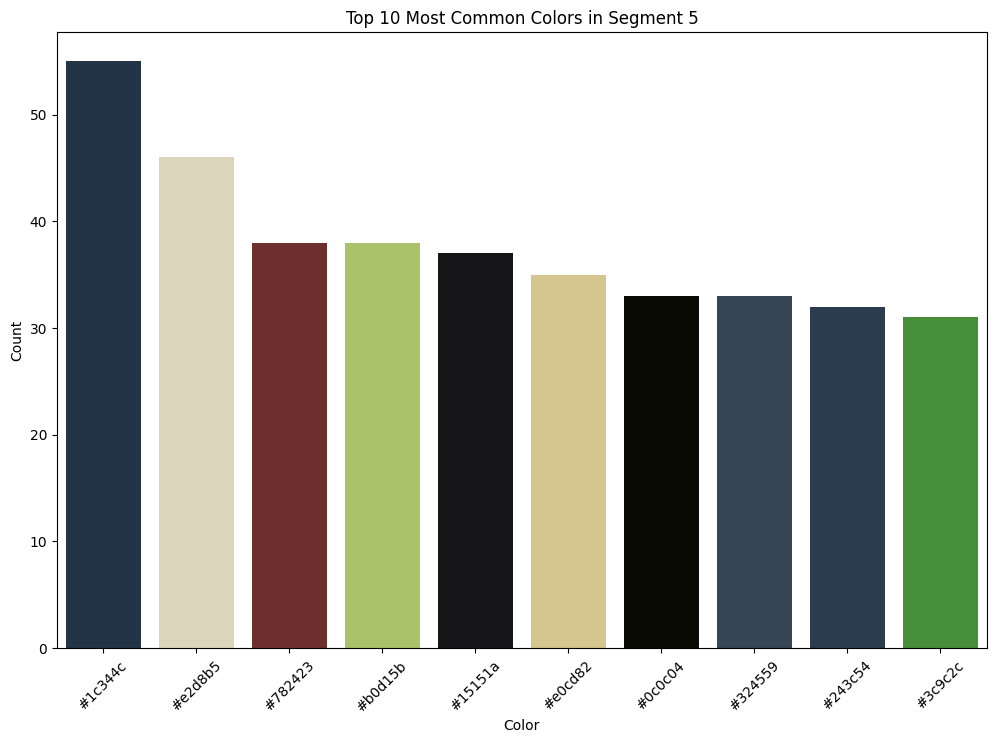

In [68]:
segment_and_analyze(df, 5)